In [1]:
# Import Besic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
import nltk

import spacy
nlp = spacy.load('en_core_web_sm')

### Reading Dataset

In [2]:
df = pd.read_csv('tweet_sorted.csv')

In [3]:
df.head(2)

,user_name,user_location,user_description,user_followers,user_friends,user_verified,date,text,hashtags,source,retweets
0,CGTN,"Beijing, China",CGTN is an international media organization. I...,13714928,69,True,2020-12-25 00:38:07,The #French National Authority for Health said...,"['French', 'vaccine']",Twitter Web App,12
1,ABP News,India,Follow for latest news alerts from India,10741934,67,True,2021-01-01 03:07:10,#WHO Grants 'Emergency Validation' For #Pfizer...,"['WHO', 'PfizerBioNTech', 'CovidVaccine']",Twitter Web App,1


### checking Null values

In [4]:
df.user_description.isnull().sum()

162

In [5]:
# df.describe(include='all')
df.describe()

,user_followers,user_friends,retweets
count,2.978000e+03,2978.000000,2978.000000
mean,5.656931e+04,1152.344191,1.720618
std,4.407986e+05,2349.444225,12.166154
min,0.000000e+00,0.000000,0.000000
25%,1.160000e+02,165.000000,0.000000
50%,5.800000e+02,457.500000,0.000000
75%,2.561750e+03,1191.750000,1.000000
max,1.371493e+07,64441.000000,446.000000


In [6]:
df.isnull().sum()

user_name             0
user_location       613
user_description    162
user_followers        0
user_friends          0
user_verified         0
date                  0
text                  0
hashtags            775
source                1
retweets              0
dtype: int64

In [7]:
df.shape

(2978, 11)

In [8]:
df.user_verified.value_counts()

False    2580
True      398
Name: user_verified, dtype: int64

# ____________________ Data Visualisation ___________________________

## Types of account

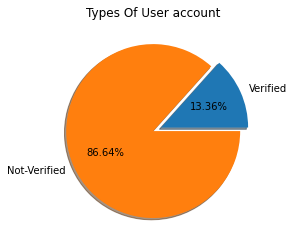

In [9]:
user = df['user_verified'].value_counts().to_dict()
user['Verified'] = user.pop(True)
user['Not-Verified'] = user.pop(False)

plt.figure(figsize=(4,4))
plt.title("Types Of User account")
plt.pie(x=user.values(), labels=user.keys(), autopct='%1.2f%%', shadow=True, explode = [0.1, 0])
plt.show()

## User source(device) used for tweets

In [10]:
sours = df.source.value_counts()[:5]

In [11]:
sours.index

Index(['Twitter for iPhone', 'Twitter Web App', 'Twitter for Android',
       'TweetDeck', 'Twitter for iPad'],
      dtype='object')

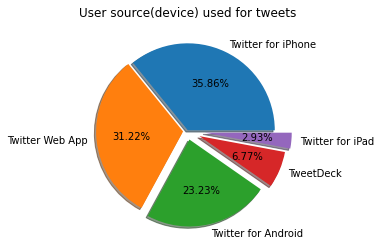

In [12]:
plt.figure(figsize=(4,4))
plt.title("User source(device) used for tweets")
plt.pie(x=sours.values, labels=sours.index, autopct='%1.2f%%', shadow=True, explode = [0.01,0.05,0.1,0.15,0.2])
plt.show()

## Top 20 users with highest number of tweets

In [13]:
user_tweet = df.user_name.value_counts()[:20]
user_tweet

Whtrslugcaviiersong#dontstayhomeandcatchcovid19    30
Medical Study Blog                                 29
Khaleej Times                                      26
Simon Hodes ⬅️2m➡️ 😷                               25
Dr.Krutika Kuppalli                                22
New Straits Times                                  22
ILKHA                                              19
Sue Reeve ♥️🧡💛💚💙💜🇪🇺🇪🇺🏳️‍🌈🏳️‍🌈                      18
🕷Financial Bear 3.5%                               17
Marc Siegel MD                                     16
Gulf News                                          16
Opoyi                                              13
Post-Polio News (ppn)                              12
🚶🏻Curtis S. Chin                                   11
LatestLY                                           11
Tamer Yazar                                        11
Financial Mirror                                   10
The Peninsula Qatar                                10
Joanbeam3000                

In [14]:
# plt.figure(figsize=(10,5))
# sns.countplot(y='user_name', data=df, order=df['user_name'].value_counts().index[:15])
# plt.xlabel('Number of Tweets', weight='bold')
# plt.ylabel('User Name', weight='bold')
# plt.show()


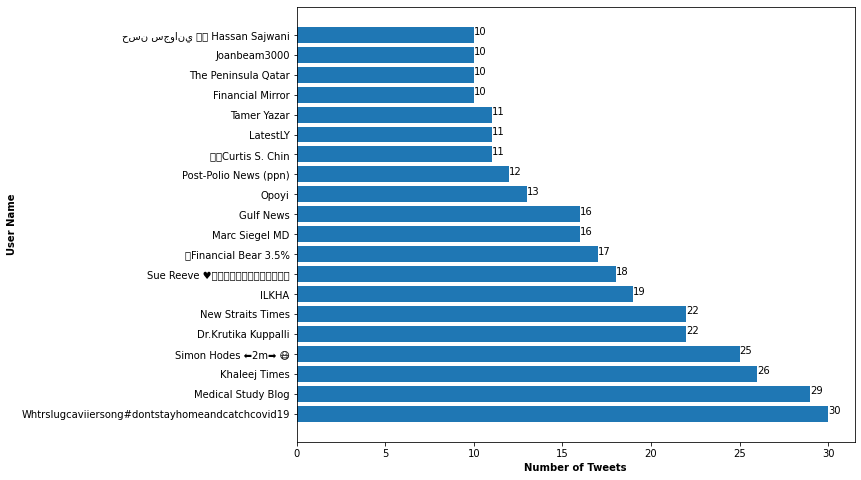

In [15]:
plt.figure(figsize=(10,8))
plt.xlabel('Number of Tweets', weight='bold')
plt.ylabel('User Name', weight='bold')
plt.barh(user_tweet.index, user_tweet.values)
for index, value in enumerate(user_tweet):
    plt.text(value, index, str(value))

# Top 20 Location with highest number of User

# Data preprocessing

In [16]:
# Get Country only

def country_get(loc):
    
    try:
        loc = loc.replace(", ", ",")
        loc = loc.replace(' ,',',')
        lc = loc.split(',')
        country = lc[-1]
    except:
        country = loc
    return country

In [17]:
country_get('New Delhi, India')

'India'

In [18]:
df['user_location'] = df['user_location'].apply(country_get)

In [19]:
user_location = df.user_location.value_counts()[:20]
user_location

India                             140
England                           134
USA                               108
United Arab Emirates               68
United Kingdom                     63
Canada                             46
Ireland                            43
UK                                 42
Malaysia                           35
CA                                 33
TX                                 31
Ontario                            30
Email:talksavailable@gmail.com     30
France                             26
NY                                 26
Watford                            25
FL                                 25
London                             25
United States                      24
GA                                 20
Name: user_location, dtype: int64

### Visual of top 20 location

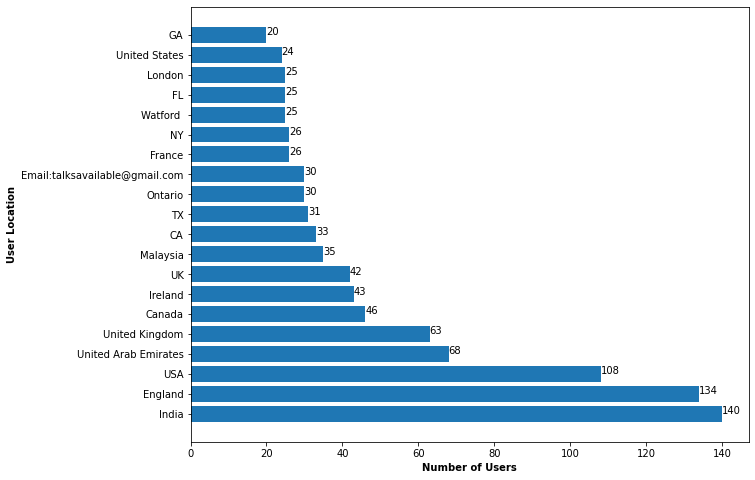

In [20]:
plt.figure(figsize=(10,8))
plt.xlabel('Number of Users', weight='bold')
plt.ylabel('User Location', weight='bold')
plt.barh(user_location.index, user_location.values)
for index, value in enumerate(user_location):
    plt.text(value, index, str(value))

# Getting Corellation

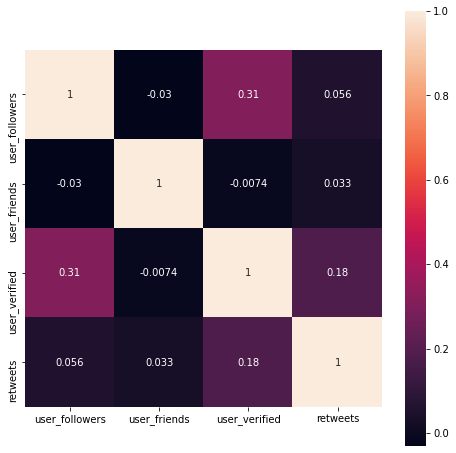

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.drop(columns=[]).corr(), square=True, annot=True)
plt.show()

# Text Cleaning

In [22]:
# Text Cleaning Function
import re
punct = string.punctuation
nlp.Defaults.stop_words |= {"nan","brigade ","new","moderna","cyprus","medium","alle","black","solo","husband","uae",
                            "rep", "lmc", "nhs"}
def clean(text):
    try:
        text = re.sub(r"http\S+", "", text)
        text = text.lower()  #Convert text in lower case
        text = text.replace("[^a-zA-Z#]", " ")
        punc_removed = [char for char in text if char not in punct]  #Removing Punctuations
        punc_removed_join = ''.join(punc_removed) 

        doc= nlp(punc_removed_join)
        text_out = [token.lemma_ for token in doc if token.is_stop == False and token.is_alpha and len(token)>2]
        txt = ' '.join(text_out)
    except:
        txt = ''
    return txt

#### Clean User Description

In [23]:
df['user_description'] = df['user_description'].apply(clean)

### Clean Text column

In [24]:
df['text'] = df['text'].apply(clean)

### Concat User_description And Text column

In [25]:
df['text_comb'] = df['user_description'] + ' '+ df['text']

In [26]:
df['user_description'][10]

'late update news live coverage economy company market politic technology indias lead business daily'

In [27]:
df['text'][10]

'nurse practitioner christianacare hospital delaware administer dose vaccine produce'

In [28]:
df['text_comb'][10]

'late update news live coverage economy company market politic technology indias lead business daily nurse practitioner christianacare hospital delaware administer dose vaccine produce'

In [29]:
df = df.drop(['user_description','text'],axis=1)

In [30]:
df.head(2)

,user_name,user_location,user_followers,user_friends,user_verified,date,hashtags,source,retweets,text_comb
0,CGTN,China,13714928,69,True,2020-12-25 00:38:07,"['French', 'vaccine']",Twitter Web App,12,cgtn international medium organization aim pro...
1,ABP News,India,10741934,67,True,2021-01-01 03:07:10,"['WHO', 'PfizerBioNTech', 'CovidVaccine']",Twitter Web App,1,follow late news alert india grant emergency v...


# Sentiment Analysis on Combined text

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [32]:
df['scores'] = df['text_comb'].apply(lambda text: sid.polarity_scores(text))

In [33]:
df.head()

,user_name,user_location,user_followers,user_friends,user_verified,date,hashtags,source,retweets,text_comb,scores
0,CGTN,China,13714928,69,True,2020-12-25 00:38:07,"['French', 'vaccine']",Twitter Web App,12,cgtn international medium organization aim pro...,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp..."
1,ABP News,India,10741934,67,True,2021-01-01 03:07:10,"['WHO', 'PfizerBioNTech', 'CovidVaccine']",Twitter Web App,1,follow late news alert india grant emergency v...,"{'neg': 0.142, 'neu': 0.601, 'pos': 0.257, 'co..."
2,The Hindu,India,6569222,212,True,2020-12-22 07:40:00,['PfizerBioNTech'],TweetDeck,0,news feed indias national newspaper begin admi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,The Hindu,India,6569222,212,True,2020-12-22 04:45:06,"['EU', 'PfizerBioNTech', 'coronavirusvaccine']",SocialFlow,3,news feed indias national newspaper finally gi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,The Hindu,India,6565800,211,True,2020-12-18 11:30:00,NaN,TweetDeck,3,news feed indias national newspaper challenge ...,"{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'comp..."


In [34]:
df['compound'] = df['scores'].apply(lambda score_dict : score_dict['compound'])

In [35]:
def sent(comp):
    if comp > 0:
        p = "Positive"
    elif comp < 0:
        p = "Negetive"
    else :
        p = "Neutral"
    return p

### ========== Check postive or negative ==========

In [36]:
df['sentment'] = df['compound'].apply(sent)
df.head()

,user_name,user_location,user_followers,user_friends,user_verified,date,hashtags,source,retweets,text_comb,scores,compound,sentment
0,CGTN,China,13714928,69,True,2020-12-25 00:38:07,"['French', 'vaccine']",Twitter Web App,12,cgtn international medium organization aim pro...,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.5994,Positive
1,ABP News,India,10741934,67,True,2021-01-01 03:07:10,"['WHO', 'PfizerBioNTech', 'CovidVaccine']",Twitter Web App,1,follow late news alert india grant emergency v...,"{'neg': 0.142, 'neu': 0.601, 'pos': 0.257, 'co...",0.2732,Positive
2,The Hindu,India,6569222,212,True,2020-12-22 07:40:00,['PfizerBioNTech'],TweetDeck,0,news feed indias national newspaper begin admi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,The Hindu,India,6569222,212,True,2020-12-22 04:45:06,"['EU', 'PfizerBioNTech', 'coronavirusvaccine']",SocialFlow,3,news feed indias national newspaper finally gi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,The Hindu,India,6565800,211,True,2020-12-18 11:30:00,NaN,TweetDeck,3,news feed indias national newspaper challenge ...,"{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'comp...",0.8176,Positive


In [37]:
df.scores[1]

{'neg': 0.142, 'neu': 0.601, 'pos': 0.257, 'compound': 0.2732}

## Most hastag(#) used

### cleaning hastag

In [38]:
# Text Cleaning Function
punct = string.punctuation

def hastag_clean(text):
    try:
        text = text.replace("[^a-zA-Z#]", " ")
        punc_removed = [char for char in text if char not in punct]  #Removing Punctuations
        txt = ''.join(punc_removed)
        doc = nlp(txt)
    except:
        doc = ''
    return doc

In [39]:
(hastag_clean("['WHO', 'PfizerBioNTech', 'CovidVaccine']"))

WHO PfizerBioNTech CovidVaccine

In [40]:
df['hashtags'] = df['hashtags'].apply(hastag_clean)

# Getting most comman Hastag

In [41]:
has_list = []
for i in range(len(df.hashtags)):
    try:
        for word in df.hashtags[i]:
            has_list.append(word)
    except:
        pass

In [42]:
from collections import Counter
has_list = str(has_list)
doc1 = nlp(has_list)

words = [token.text for token in doc1 if token.is_punct != True]
word_freq = Counter(words)

In [43]:
common_words = word_freq.most_common(20)
common_words

[('PfizerBioNTech', 1472),
 ('COVID19', 404),
 ('vaccine', 285),
 ('CovidVaccine', 232),
 ('Pfizer', 144),
 ('coronavirus', 106),
 ('Moderna', 95),
 ('Pfizervaccine', 82),
 ('Covid19', 72),
 ('vaccination', 63),
 ('vaccines', 58),
 ('AstraZeneca', 52),
 ('PfizerVaccine', 51),
 ('Dubai', 43),
 ('COVID19Vaccine', 40),
 ('PfizerCovidVaccine', 35),
 ('Vaccine', 32),
 ('COVID', 30),
 ('BioNTech', 29),
 ('covid19', 28)]

## Name Entity Recognization

In [44]:
def NER(text):
    dict_ = {}
    text = nlp(text)    
    labels = set([w.label_ for w in text.ents])
    for label in labels:
        entities = [e.string for e in text.ents if label==e.label_]
        entities = list(set(entities))
#         print(label,entities)
        dict_[label] = entities
    return dict_

In [45]:
df.text_comb[0]

'cgtn international medium organization aim provide global audience accurate timely news coverage rich audiovisual service french national authority health say thursday approve vaccine develop'

In [46]:
NER(df.text_comb[30])

{'ORG': ['content matter trust ', 'gulf news pfizerbiontech ']}

In [47]:
df['ner'] = df['text_comb'].apply(NER)

In [48]:
df.head(2)

,user_name,user_location,user_followers,user_friends,user_verified,date,hashtags,source,retweets,text_comb,scores,compound,sentment,ner
0,CGTN,China,13714928,69,True,2020-12-25 00:38:07,"(French, vaccine)",Twitter Web App,12,cgtn international medium organization aim pro...,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.5994,Positive,"{'NORP': ['french '], 'ORG': ['cgtn internatio..."
1,ABP News,India,10741934,67,True,2021-01-01 03:07:10,"(WHO, PfizerBioNTech, CovidVaccine)",Twitter Web App,1,follow late news alert india grant emergency v...,"{'neg': 0.142, 'neu': 0.601, 'pos': 0.257, 'co...",0.2732,Positive,{'GPE': ['india ']}


In [49]:
from spacy import displacy
text_list = []
# text_list = str(text_list)
for i in range(len(df.text_comb)):
    text_list.append(df.text_comb[i])

In [50]:
df.ner[34]

{'ORG': ['content matter trust ',
  'gulf news ',
  'pfizerbiontech vaccine dubai vaccine ']}

In [51]:
text_list = str(text_list[:10])
tx = nlp(text_list)
displacy.serve(tx, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [18/Jan/2021 14:22:24] "GET /' HTTP/1.1" 200 9825
127.0.0.1 - - [18/Jan/2021 14:22:24] "GET /favicon.ico HTTP/1.1" 200 9825


Shutting down server on port 5000.


#### "Open with this url :-->" 'http://127.0.0.1:5000/'

# Getting TOPIC keyword from text

In [52]:
def token(text):
    removal=['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']  #get Noun phrase
    tok = []
    doc= nlp(text)
    for token in doc:
        if token.is_stop == False and token.is_alpha and len(token)>2 and token.pos_ not in removal:
            lemma = token.lemma_            #lemmatization of token word
            tok.append(lemma)
            
    return tok

In [53]:
df['token'] = df['text_comb'].apply(token)

In [54]:
df.head(3)

,user_name,user_location,user_followers,user_friends,user_verified,date,hashtags,source,retweets,text_comb,scores,compound,sentment,ner,token
0,CGTN,China,13714928,69,True,2020-12-25 00:38:07,"(French, vaccine)",Twitter Web App,12,cgtn international medium organization aim pro...,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.5994,Positive,"{'NORP': ['french '], 'ORG': ['cgtn internatio...","[cgtn, international, organization, aim, provi..."
1,ABP News,India,10741934,67,True,2021-01-01 03:07:10,"(WHO, PfizerBioNTech, CovidVaccine)",Twitter Web App,1,follow late news alert india grant emergency v...,"{'neg': 0.142, 'neu': 0.601, 'pos': 0.257, 'co...",0.2732,Positive,{'GPE': ['india ']},"[follow, late, news, alert, india, grant, emer..."
2,The Hindu,India,6569222,212,True,2020-12-22 07:40:00,(PfizerBioNTech),TweetDeck,0,news feed indias national newspaper begin admi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'DATE': ['week ago '], 'ORG': ['indias nation...","[news, feed, indias, national, newspaper, begi..."


In [55]:
val = []
for i in range(len(df)):
    val.append(df['token'][i])

### # import gensim library

In [57]:
from gensim import models,corpora
dictionary = corpora.Dictionary(val)
dictionary

### Creating bag of words

In [58]:
bow_corpus = [dictionary.doc2bow(doc) for doc in val]
# bow_corpus

##### process gensim model for topic identification

In [59]:
import gensim
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 20, id2word = dictionary, passes = 10,workers = 2)

In [60]:
lda_model

### Printing Topics and Its keywords

In [61]:
# Printing Topics and Its keywords
num_topics = 20
for i in range(num_topics):
    tt = lda_model.get_topic_terms(i,10)
    topic = ', '.join([dictionary[pair[0]] for pair in tt])
    print("TOPIC: {} \nTOPIC WORDS : {}".format(i+1, topic ))
    print()

TOPIC: 1 
TOPIC WORDS : pfizerbiontech, available, female, vaccine, original, hot, hirecheer, songwritersingersong, whtrslugcaviiersongiam, sale

TOPIC: 2 
TOPIC WORDS : pfizerbiontech, news, vaccine, account, agency, twitter, dose, polio, coronavirus, official

TOPIC: 3 
TOPIC WORDS : pfizerbiontech, vaccine, view, pfizer, old, news, diabetes, manc, appraiser, patientsatthecentre

TOPIC: 4 
TOPIC WORDS : pfizerbiontech, vaccine, health, covidvaccine, policy, expert, pandemic, congress, infection, global

TOPIC: 5 
TOPIC WORDS : vaccine, pfizerbiontech, science, hand, receive, scientist, dose, base, heart, feel

TOPIC: 6 
TOPIC WORDS : vaccine, pfizerbiontech, vaccination, covid, today, view, health, dose, people, live

TOPIC: 7 
TOPIC WORDS : vaccine, daily, pfizerbiontech, english, official, lead, twitter, feed, time, dose

TOPIC: 8 
TOPIC WORDS : pfizerbiontech, vaccine, news, world, approve, coronavirus, music, covidvaccine, break, use

TOPIC: 9 
TOPIC WORDS : pfizerbiontech, vacci

## Visualize the topics

In [67]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

C:\Users\satyam.singh\anaconda3\envs\keras\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.027475 -0.101257       1        1  7.437013
12     0.067425  0.029171       2        1  7.343400
18    -0.005036 -0.107054       3        1  6.585686
15     0.152888  0.043388       4        1  5.852985
9     -0.019790  0.001286       5        1  5.651804
19     0.026479 -0.045302       6        1  5.604158
17    -0.045647  0.001244       7        1  5.582490
7      0.067136  0.021069       8        1  5.423598
2     -0.001658 -0.042579       9        1  5.293482
1      0.136805 -0.001885      10        1  5.117301
6      0.054205 -0.030145      11        1  5.039942
3     -0.045057 -0.034153      12        1  4.911779
5     -0.035746 -0.001277      13        1  4.825345
11    -0.077069 -0.059400      14        1  4.148952
8     -0.025090  0.079619      15        1  3.913914
14    -0.039787  0.005439      16        1  3.683686
0     -0.068634  0.149212      17        1  3.606881
16    -0.051474  0.000298      18        1  3.533399
13     0.008029  0.032907      19        1  3.456125
4     -0.070503  0.059419      20        1  2.988060, topic_info=          Term        Freq       Total Category  logprob  loglift
14        news  466.000000  466.000000  Default  30.0000  30.0000
104      daily   84.000000   84.000000  Default  29.0000  29.0000
74    official   89.000000   89.000000  Default  28.0000  28.0000
259    english   74.000000   74.000000  Default  27.0000  27.0000
203  available   45.000000   45.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
357      today    5.176483  154.827797  Topic20  -5.6762   0.1124
26      follow    5.053409   85.396759  Topic20  -5.7002   0.6833
383    medical    4.707857  147.461682  Topic20  -5.7711   0.0662
555      think    4.598447   55.896407  Topic20  -5.7946   1.0128
188       work    4.536527  119.545346  Topic20  -5.8081   0.2390

[1316 rows x 6 columns], token_table=       Topic      Freq                     Term
term                                           
6577       9  0.728529                 abhimani
1402       2  0.052399                 academic
1402       3  0.419189                 academic
1402       6  0.052399                 academic
1402       8  0.052399                 academic
...      ...       ...                      ...
4178      10  0.908197                 étudiant
6340       5  0.907727        ökolsozialliberal
6341       5  0.907721                übersetze
714        6  0.875247  اللهثمالوطنثمرئيسالدولة
10841     18  0.844764                  للأطفال

[4127 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 13, 19, 16, 10, 20, 18, 8, 3, 2, 7, 4, 6, 12, 9, 15, 1, 17, 14, 5])